Quantitative Finance
-----
Final Project Jupyter Notebook

Name: Yongjie Ye

Email: yye16@simon.rochester.edu

### Data Fetch and Pre-process

In [ ]:
# I comment out the crsp connection process as I have downloaded the data pkl in Google Drive
# File share link is in the 4th code box

# !pip install wrds
# import wrds
# conn=wrds.Connection()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstal

In [ ]:
# crsp_m = conn.raw_sql("""
#                       select a.permno, a.date, b.shrcd, b.exchcd,
#                       a.ret, a.shrout, a.prc,a.retx
#                       from crsp.msf as a
#                       left join crsp.msenames as b
#                       on a.permno=b.permno
#                       and b.namedt<=a.date
#                       and a.date<=b.nameendt
#                       where a.date between '01/01/2010' and '03/31/2024'
#                       and b.exchcd between 1 and 3
#                       and b.shrcd between 10 and 11
#                       """, date_cols=['date'])

# crsp_m.to_pickle('/content/crsp_m_20240331.pkl')

In [ ]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
from dateutil.relativedelta import *
from pandas.tseries.offsets import *

# if installation of statsmodel is unsucessful, please reinstall the older version of numpy using line 9
# !pip install numpy==1.24.3
import statsmodels.api as sm

In [ ]:
# Google Drive File Share Link
# https://drive.google.com/file/d/1nSaZ6Oxh8M59yssQ33W9-G7JX00bznlx/view?usp=sharing

url="/content/drive/MyDrive/crsp_m_20240331.pkl"
df = pd.read_pickle(url)
df['permno'] = df[['permno']].astype(int)
df['date'] = df['date'] + MonthEnd(0)
df

,permno,date,shrcd,exchcd,ret,shrout,prc,retx
0,10032,2010-01-31,11,3,0.194171,39774.0,34.01,0.194171
1,10032,2010-02-28,11,3,0.014114,39774.0,34.49,0.014114
2,10032,2010-03-31,11,3,0.044651,39774.0,36.03,0.044651
3,10032,2010-04-30,11,3,0.029143,40359.0,37.08,0.029143
4,10032,2010-05-31,11,3,-0.081715,40359.0,34.05,-0.081715
...,...,...,...,...,...,...,...,...
142127,89813,2011-11-30,11,1,0.032993,387153.0,56.67,0.032993
142128,89813,2011-12-31,11,1,-0.013587,387153.0,55.90,-0.013587
142129,89813,2012-01-31,11,1,0.109481,387153.0,62.02,0.109481
142130,89813,2012-02-29,11,1,0.089810,388124.0,67.59,0.089810


In [ ]:
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets
from pandas.tseries.offsets import MonthEnd
from datetime import datetime

start = datetime(2010,1,1)
end = datetime(2023,12,31)

ds = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start, end)
factor = ds[0]
factor.index = pd.to_datetime(factor.index.to_timestamp())
factor.index = factor.index + MonthEnd(0)
factor

<ipython-input-41-7f5cf7784820>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ds = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start, end)
<ipython-input-41-7f5cf7784820>:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ds = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start, end)


,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
2010-01-31,-3.36,0.34,0.43,-1.27,0.46,0.00
2010-02-28,3.40,1.51,3.23,-0.27,1.43,0.00
2010-03-31,6.31,1.85,2.21,-0.65,1.69,0.01
2010-04-30,2.00,4.98,2.89,0.69,1.72,0.01
2010-05-31,-7.89,0.04,-2.44,1.30,-0.21,0.01
...,...,...,...,...,...,...
2023-08-31,-2.39,-3.65,-1.06,3.43,-2.37,0.45
2023-09-30,-5.24,-1.80,1.52,1.86,-0.83,0.43
2023-10-31,-3.19,-4.05,0.19,2.46,-0.66,0.47


### Define Strategy and Evaluation Function

In [ ]:
# define strategy function
def strategy_kur(df, ngroups, lookback, skip, w_method):
  df['mcap'] = df['prc'].abs()*df['shrout']
  df['return2'] = df['ret'].copy()
  df = df.set_index(['date'])
  temp = (df.groupby('permno'))[['return2']].rolling(window=lookback).apply(lambda x: pd.Series(x).kurtosis())
  temp = temp.rename(columns={'return2':'kur'})
  temp = temp.reset_index()
  temp = pd.merge(df.reset_index(), temp[['permno','date','kur']], how='left', on=['permno','date'])
  temp = temp.sort_values(['date','permno'])
  temp['kur_skipped'] = temp.groupby(['permno'])['kur'].shift(skip)
  temp = temp.dropna(subset=['kur_skipped'], how='any')
  temp['kur_group'] = temp.groupby(['date'])['kur_skipped'].transform(lambda x: pd.qcut(x, ngroups, labels=False, duplicates='drop'))

  # weighting methods
  if w_method == 'equal':
      kur_w = temp.groupby(['date', 'kur_group'])['ret'].mean()
  elif w_method == 'market_cap':
      kur_w = temp.groupby(['date', 'kur_group']).apply(lambda x: (x.ret*x.mcap).sum()/x.mcap.sum())
  else:
      raise ValueError('Invalid weighting method specified. Please input equal, market_cap, or volume')

  kur_w = kur_w.unstack(level=-1)
  # long last group, short first group
  r_strategy = kur_w[ngroups-1].subtract(kur_w[0])

  return r_strategy

In [ ]:
# define strategy group analysis function
def groups_kur(df, ngroups, lookback, skip, w_method):
  df['mcap'] = df['prc'].abs()*df['shrout']
  df['return2'] = df['ret'].copy()
  df = df.set_index(['date'])
  temp = (df.groupby('permno'))[['return2']].rolling(window=lookback).apply(lambda x: pd.Series(x).kurtosis())
  temp = temp.rename(columns={'return2':'kur'})
  temp = temp.reset_index()
  temp = pd.merge(df.reset_index(), temp[['permno','date','kur']], how='left', on=['permno','date'])
  temp = temp.sort_values(['date','permno'])
  temp['kur_skipped'] = temp.groupby(['permno'])['kur'].shift(skip)
  temp = temp.dropna(subset=['kur_skipped'], how='any')
  temp['kur_group'] = temp.groupby(['date'])['kur_skipped'].transform(lambda x: pd.qcut(x, ngroups, labels=False, duplicates='drop'))

  # weighting methods
  if w_method == 'equal':
      kur_w = temp.groupby(['date', 'kur_group'])['ret'].mean()
      kur_w = kur_w.unstack(level=-1)
  elif w_method == 'market_cap':
      kur_w = temp.groupby(['date', 'kur_group']).apply(lambda x: (x.ret*x.mcap).sum()/x.mcap.sum())
      kur_w = kur_w.unstack(level=-1)
  else:
      raise ValueError('Invalid weighting method specified. Please input equal, market_cap, or volume')

  return kur_w

In [ ]:
# define function to evaluate different strategies
# excess return
factore = factor.copy()
factore.drop(columns=['RF'],axis=1,inplace=True)
factore = factore/100

# calculate RF in 2023 based on Fama French's data
rf12 = factor.iloc[-14:-2, factor.columns.get_loc('RF')]
rf12_cum = (1 + rf12*0.01).cumprod()
rf_2023 = rf12_cum.iloc[-1] -1 # RF in 2023

def perfeval(df, factor):
  temp = pd.merge(df, factor, left_index=True, right_index=True)
  Results = pd.DataFrame([], index=['results'], columns=['return', 'excess_return', 'std', 'sr', 'beta', 'alpha', 'ar', 'sr_max', 'std_sys_risk', 'ann_idos_risk', 'cum_ret'])

  Results['return'] = temp['r_strategy'].mean()*12
  Results['std'] = temp['r_strategy'].std()*12**0.5
  Results['sr'] = Results['return']/Results['std']
  Results['excess_return'] = Results['return'] - rf_2023

  x = temp[['Mkt-RF']]
  x = sm.add_constant(x)
  y = temp[['r_strategy']]
  model = sm.OLS(y, x).fit()
  Results['alpha'] = model.params.iloc[0] * 12
  Results['beta'] = model.params.iloc[1]
  Results["ar"] = model.params.iloc[0]*12/(model.resid.std()*12**0.5) # annualized appraisal ratio

  # Maximum Sharpe - MVE
  temp_eval = temp[['r_strategy']]
  ERe = temp_eval.mean()
  Cove = temp_eval.cov()
  weights = ERe @ np.linalg.inv(Cove)
  Results["sr_max"] = (temp_eval @ weights).mean()*12 / ((temp_eval @ weights).std()*12**0.5)

  Results['std_sys_risk'] = (((model.params.iloc[1]**2) * temp['Mkt-RF'].std()**2)**0.5)*12**0.5
  Results['ann_idos_risk'] = model.resid.std()*12**0.5
  Results['cum_ret'] = (1 + temp['r_strategy']).cumprod().iloc[-1]

  return Results

### Basic Backtest

In [ ]:
# import benchmark data from WRDS: S&P 500
url= "https://raw.githubusercontent.com/SleepYeee/QF-final-project/main/SP500_WRDS.csv"
sp500 = pd.read_csv(url)
sp500["return"] = sp500["prccm"].pct_change()

sp500['datadate'] = pd.to_datetime(sp500['datadate'])
sp500 = sp500.set_index('datadate')
sp500['cumulative_return'] = (1 + sp500['return']).cumprod()-1
sp500_subset = sp500.iloc[:-3]

<ipython-input-42-4e5ee1ff31da>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kur_w = temp.groupby(['date', 'kur_group']).apply(lambda x: (x.ret*x.mcap).sum()/x.mcap.sum())


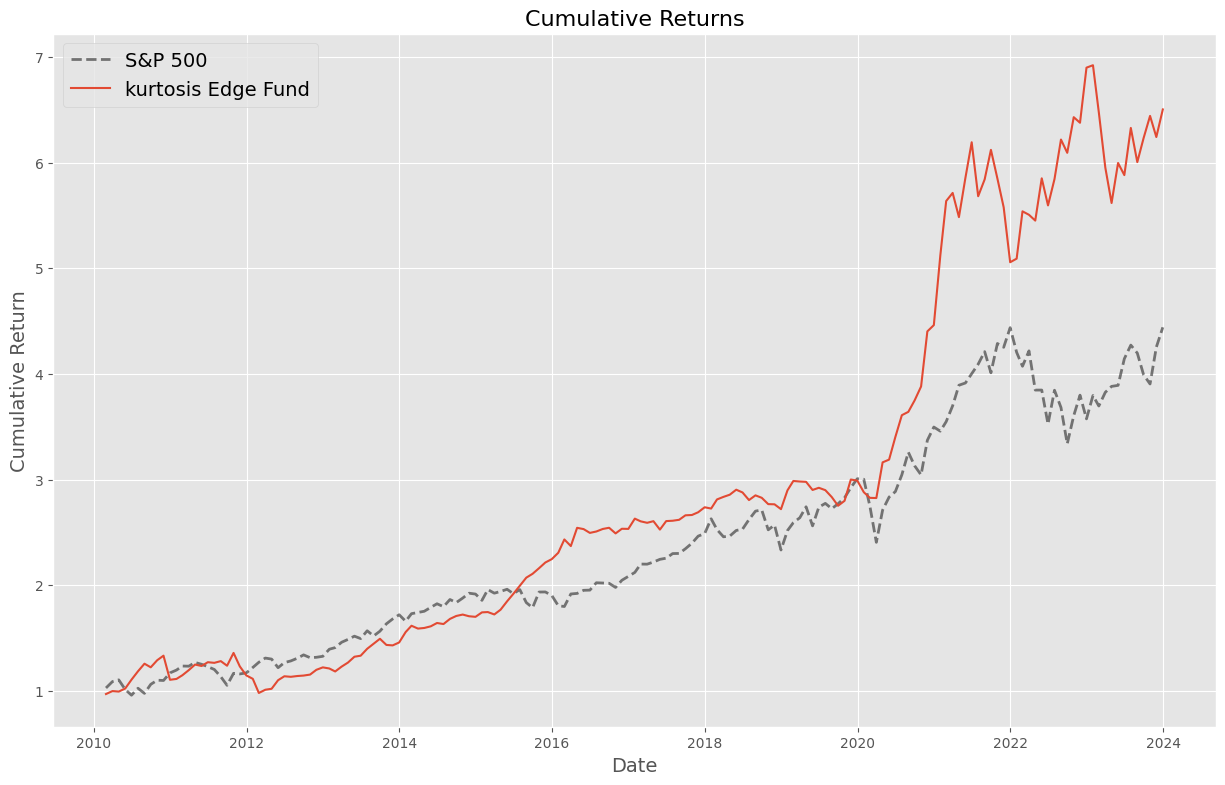

In [ ]:
# find the best parameters combination using sharp ratio
ngroups_values = [10]
lookback_values = [30]
skip_values = [1]
w_method_values = ['market_cap']

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(sp500_subset.index, sp500_subset['cumulative_return'], label='S&P 500', color='black', linestyle='--', linewidth=2, alpha=0.5)

search_results = pd.DataFrame(columns=['ngroups', 'lookback', 'skip', 'w_method', 'Sharpe Ratio'])

for ngroups in ngroups_values:
    for lookback in lookback_values:
        for skip in skip_values:
            for w_method in w_method_values:
              df2 = pd.DataFrame(strategy_kur(df, ngroups, lookback, skip, w_method), columns=['r_strategy'])
              stratege_mean = df2['r_strategy'].mean()*12
              strategy_std = df2['r_strategy'].std()*12**0.5
              sharpe_ratio_test = stratege_mean / strategy_std

              search_results.loc[len(search_results)] = {'ngroups': ngroups, 'lookback': lookback, 'skip': skip,
                                            'w_method': w_method, 'Sharpe Ratio': sharpe_ratio_test}


              df2['cumulative_return'] = (1 + df2['r_strategy']).cumprod()-1
              label = "kurtosis Edge Fund"
              ax.plot(df2.index, df2['cumulative_return'], label=label)


ax.set_title("Cumulative Returns", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cumulative Return", fontsize=14)
ax.legend(loc='upper left', fontsize=14)
plt.show()

In [ ]:
perfeval(df2,factore)

,return,excess_return,std,sr,beta,alpha,ar,sr_max,std_sys_risk,ann_idos_risk,cum_ret
results,0.146697,0.099926,0.151275,0.969738,0.075126,0.136992,0.908244,0.969738,0.011572,0.150832,6.503731


In [ ]:
sp500_subset_eval = sp500_subset['return']
sp500_subset_eval = pd.DataFrame(sp500_subset_eval)
sp500_subset_eval = sp500_subset_eval.dropna(subset=['return'], how='any')
sp500_subset_eval = sp500_subset_eval.rename(columns={'return':'r_strategy'})

In [ ]:
perfeval(sp500_subset_eval,factore)

,return,excess_return,std,sr,beta,alpha,ar,sr_max,std_sys_risk,ann_idos_risk,cum_ret
results,0.11855,0.071778,0.1481,0.800472,0.955876,-0.004933,-0.308638,0.800472,0.147234,0.015985,4.44172


### Group Anlaysis

In [ ]:
group_data = groups_kur(df,10,30,1,'market_cap')

<ipython-input-43-0a0611c36a66>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kur_w = temp.groupby(['date', 'kur_group']).apply(lambda x: (x.ret*x.mcap).sum()/x.mcap.sum())


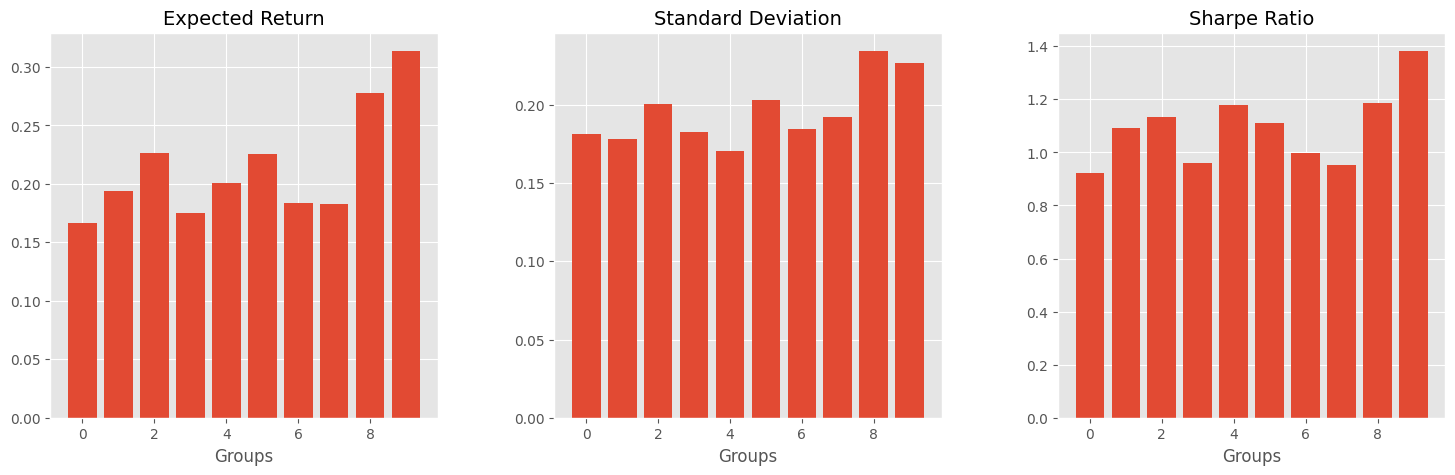

In [ ]:
ER = group_data.mean()*12
Vol = group_data.std()*12**0.5
SR = ER/Vol
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].bar(ER.index, ER,)
axes[0].set_title('Expected Return', fontsize=14)
axes[0].set_xlabel('Groups', fontsize=12)

axes[1].bar(Vol.index, Vol)
axes[1].set_title('Standard Deviation', fontsize=14)
axes[1].set_xlabel('Groups', fontsize=12)

axes[2].bar(SR.index, SR)
axes[2].set_title('Sharpe Ratio', fontsize=14)
axes[2].set_xlabel('Groups', fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.show()

### Parameter Determination

<ipython-input-42-4e5ee1ff31da>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kur_w = temp.groupby(['date', 'kur_group']).apply(lambda x: (x.ret*x.mcap).sum()/x.mcap.sum())
<ipython-input-42-4e5ee1ff31da>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kur_w = temp.groupby(['date', 'kur_group']).apply(lambda x: (x.ret*x.mcap).sum()/x.mcap.sum())
<ipython-input-42-4e5ee1ff31da>:19: DeprecationWarning: 

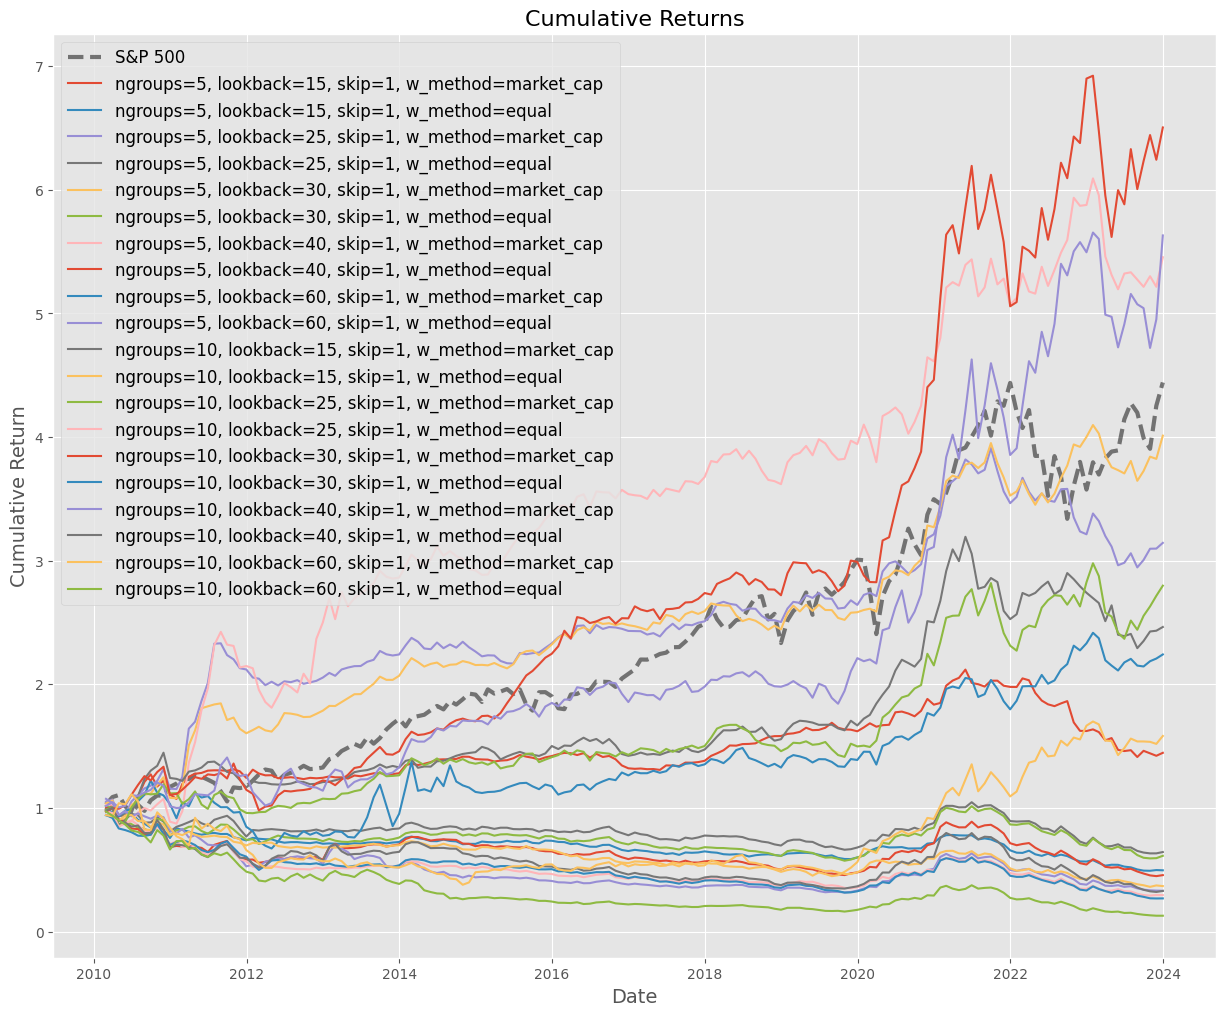

In [ ]:
# TO GRADER: RUN THIS SECTION WITH CAUTION, because it may take above 30min to finish in colab. Apologies for any inconvinience caused!

# find the best parameters combination using sharp ratio
ngroups_values = [5, 10]
lookback_values = [15,25,30,40,60]
skip_values = [1]
w_method_values = ['market_cap','equal']

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15, 12))
ax.plot(sp500_subset.index, sp500_subset['cumulative_return'], label='S&P 500', color='black', linestyle='--', linewidth=3, alpha=0.5)

search_results = pd.DataFrame(columns=['ngroups', 'lookback', 'skip', 'w_method', 'Sharpe Ratio'])

for ngroups in ngroups_values:
    for lookback in lookback_values:
        for skip in skip_values:
            for w_method in w_method_values:
              df2 = pd.DataFrame(strategy_kur(df, ngroups, lookback, skip, w_method), columns=['r_strategy'])
              sharpe_ratio_test = ((df2['r_strategy'].mean()*12) / (df2['r_strategy'].std()*12**0.5))

              search_results.loc[len(search_results)] = {'ngroups': ngroups, 'lookback': lookback, 'skip': skip,
                                            'w_method': w_method, 'Sharpe Ratio': sharpe_ratio_test}


              df2['cumulative_return'] = (1 + df2['r_strategy']).cumprod()-1
              label = f"ngroups={ngroups}, lookback={lookback}, skip={skip}, w_method={w_method}"
              ax.plot(df2.index, df2['cumulative_return'], label=label)


ax.set_title("Cumulative Returns", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cumulative Return", fontsize=14)
ax.legend(loc='upper left', fontsize=12)
plt.show()

In [ ]:
search_results

,ngroups,lookback,skip,w_method,Sharpe Ratio
0,5,15,1,market_cap,0.316354
1,5,15,1,equal,-0.583457
2,5,25,1,market_cap,0.649703
3,5,25,1,equal,-0.255283
4,5,30,1,market_cap,0.795749
5,5,30,1,equal,-0.234258
6,5,40,1,market_cap,0.743188
7,5,40,1,equal,-0.316301
8,5,60,1,market_cap,0.392706
9,5,60,1,equal,-0.425518


30-day lookback window yields the best result

### Robustness Test

In [ ]:
r_strategy = strategy_kur(df,10,30,1,'market_cap')

<ipython-input-4-4e5ee1ff31da>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kur_w = temp.groupby(['date', 'kur_group']).apply(lambda x: (x.ret*x.mcap).sum()/x.mcap.sum())


In [ ]:
from scipy.stats import norm

# Set the number of bootstrap samples
n_bootstraps = 10000
bootstrap_sharpe_ratios = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
    bootstrap_sample = r_strategy.sample(len(r_strategy), replace=True)

    mean_return = bootstrap_sample.mean()*12
    std_return = bootstrap_sample.std()*12**0.5
    bootstrap_sharpe_ratios[i] = mean_return / std_return

original_sharpe_ratio = (r_strategy.mean()*12) / (r_strategy.std()*12**0.5)

alpha = 0.05
lower_ci = np.percentile(bootstrap_sharpe_ratios, alpha / 2 * 100)
upper_ci = np.percentile(bootstrap_sharpe_ratios, (1 - alpha / 2) * 100)

print(f"Original Sharpe ratio: {original_sharpe_ratio:.4f}")
print(f"{(1 - alpha) * 100}% Confidence Interval: [{lower_ci:.4f}, {upper_ci:.4f}]")

Original Sharpe ratio: 0.9697
95.0% Confidence Interval: [0.4264, 1.5747]


### Drawdowns Analysis

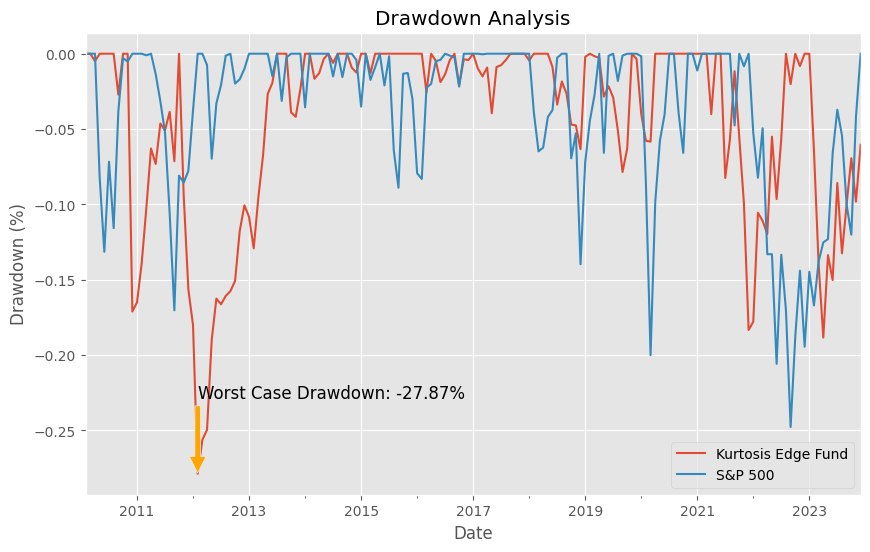

In [ ]:
# start by cumulating the returns
X = (r_strategy + 1).cumprod()
Y = (sp500_subset_eval + 1).cumprod()

# computing the running max for each asset
running_max = X.cummax()
running_max_sp = Y.cummax()

# Calculate the drawdown by comparing the running_max with the current value of the portfolio
drawdown = (X - running_max) / running_max
drawdown_sp = (Y - running_max_sp) / running_max_sp

# Add a data label to the minimum value point
min_value = drawdown.min().item()
min_idx = drawdown.idxmin().item()
min_value_sp = drawdown_sp.min().item()
min_idx_sp = drawdown_sp.idxmin().item()

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
drawdown.plot(ax=ax)
drawdown_sp.plot(ax=ax)

ax.annotate(
    f'Worst Case Drawdown: {min_value:.2%}',
    xy=(min_idx, min_value),
    xytext=(min_idx, min_value + 0.05),
    arrowprops=dict(facecolor='orange', shrink=0.01),
    fontsize=12,
)

plt.title('Drawdown Analysis')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
ax.legend(["Kurtosis Edge Fund", "S&P 500"])
plt.show()

In [ ]:
# Drawdown is smaller than -10% in above 80% of back test months
len(drawdown[drawdown < -0.1]) / len(drawdown)

0.17365269461077845

In [ ]:
# this is a change